<a href="https://colab.research.google.com/github/vigneshT241801508/FOML/blob/main/Ex_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Classroom/Machine Learning/ObesityDataSet.csv'

In [ ]:
df = pd.read_csv(file_path)
print("=== FIRST FEW ROWS ===")
print(df.head())

=== FIRST FEW ROWS ===
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public

In [ ]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [ ]:
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
            X[col] = le.fit_transform(X[col])

            y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42)

In [ ]:
kernels = {
      'rbf': {'C': 1.0, 'gamma': 'scale'},
      'linear': {'C': 1.0},
      'poly': {'C': 1.0, 'degree': 3, 'gamma': 'scale'},
       'sigmoid': {'C': 1.0, 'gamma': 'scale'}
          }
accuracy_dict = {}

In [ ]:
for kernel_name, params in kernels.items():
 print(f"\n=== SVM with {kernel_name.upper()} kernel ===")

model = SVC(kernel=kernel_name, **params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

accuracy_dict[kernel_name] = acc


=== SVM with RBF kernel ===

=== SVM with LINEAR kernel ===

=== SVM with POLY kernel ===

=== SVM with SIGMOID kernel ===
Confusion Matrix:
 [[ 5  0  0  0 51  0  0]
 [ 0  0  0  0 62  0  0]
 [ 0  7  0  0 67  4  0]
 [ 0 46  0  0 12  0  0]
 [ 0 47  0  0 10  6  0]
 [ 0  0  0  0 56  0  0]
 [ 0  0  0  0 50  0  0]]
Accuracy: 0.0355
Precision: 0.1372
Recall: 0.0355
F1-Score: 0.0297


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


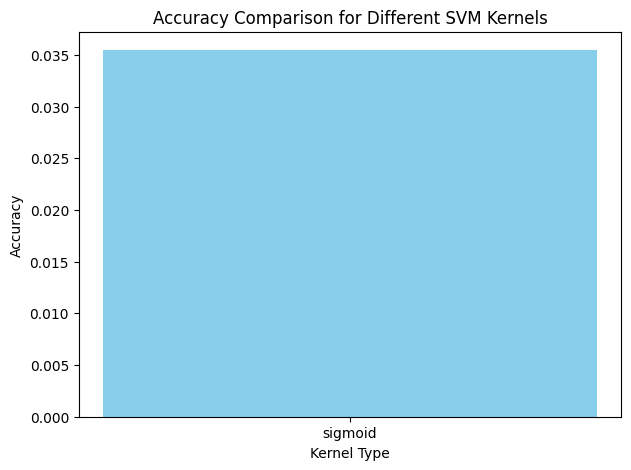

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(accuracy_dict.keys(), accuracy_dict.values(),
        color=['skyblue','lightgreen','orange','pink'])
plt.title("Accuracy Comparison for Different SVM Kernels")
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
cv_results = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

for kernel_name, params in kernels.items():
 model = SVC(kernel=kernel_name, **params)
scores = cross_validate(model, X, y, cv=kf, scoring=metrics)
cv_results[kernel_name] = {
'Accuracy': np.mean(scores['test_accuracy']),
'Precision': np.mean(scores['test_precision_weighted']),
'Recall': np.mean(scores['test_recall_weighted']),
'F1-Score': np.mean(scores['test_f1_weighted'])
                          }

cv_df = pd.DataFrame(cv_results).T
print("\n=== 5-FOLD CROSS VALIDATION RESULTS ===")
print(cv_df)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


=== 5-FOLD CROSS VALIDATION RESULTS ===
         Accuracy  Precision    Recall  F1-Score
sigmoid  0.030315   0.098464  0.030315   0.01636


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


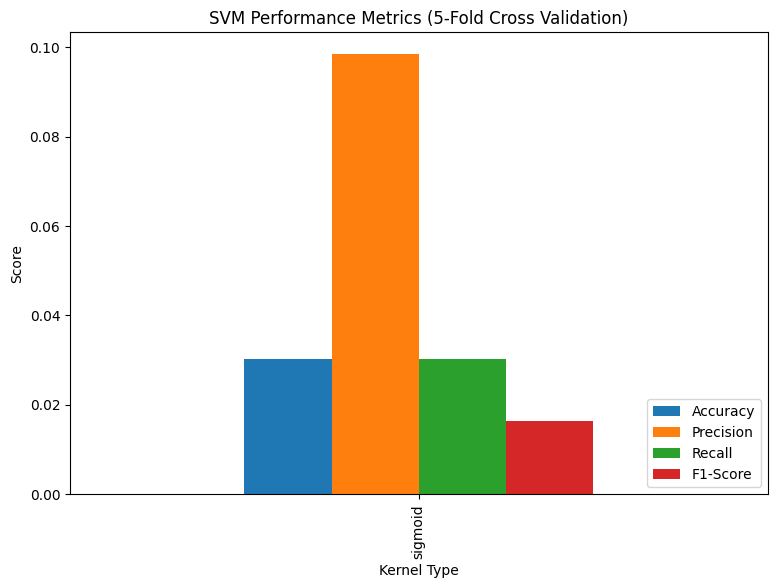

In [ ]:
cv_df.plot(kind='bar', figsize=(9,6))
plt.title("SVM Performance Metrics (5-Fold Cross Validation)")
plt.ylabel("Score")
plt.xlabel("Kernel Type")
plt.legend(loc='lower right')
plt.show()

In [ ]:
final_model = SVC(kernel='rbf', C=1.0, gamma='scale')
final_model.fit(X_train, y_train)

print("\nFirst 5 Support Vectors:")
print(final_model.support_vectors_[:5])


First 5 Support Vectors:
[[ 0.       22.99368   1.741377 54.877111  1.        1.        3.
   3.        1.        0.        2.009796  0.        2.        0.071317
   3.        3.      ]
 [ 1.       17.405104  1.82525  58.913579  1.        1.        2.580872
   3.887906  2.        0.        2.        0.        2.        0.453649
   3.        0.      ]
 [ 0.       21.478496  1.686936 51.256059  1.        1.        3.
   3.179995  1.        0.        1.910378  0.        0.480614  0.625079
   3.        3.      ]
 [ 1.       18.128249  1.699437 52.08657   1.        1.        2.853513
   3.        2.        0.        2.        0.        0.680464  1.258881
   2.        3.      ]
 [ 1.       17.469417  1.798645 59.612717  1.        1.        2.336044
   4.        2.        0.        2.        0.        2.        0.133005
   3.        0.      ]]
